In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import altair as alt

# Bring in data

In [67]:
# IHME
ihme_path = 'data/ihme-covid19-04082020/2020_04_07.06.all/Hospitalization_all_locs.csv'
ihme = pd.read_csv(ihme_path)
ihme_mt = ihme[ihme['location_name'] == 'Montana']
ihme_mt.set_index('date', inplace=True)

#HGHI
# hghi_path = 'data/HGHI_results_040820.csv'
# hghi = pd.read_csv(hghi_path)

# CovidActNow
can_path = 'data/covidactnow/'
can_cols = [
        "day_index",
        "date",
        "a",
        "b",
        "c",
        "d",
        "e",
        "f",
        "g",
        "all_hospitalized",
        "all_infected",
        "dead",
        "beds",
        "i",
        "j",
        "k",
        "l",
        "population",
        "m",
        "n",
    ]
can0 = pd.read_json(can_path+'MT.0.json')
can1 = pd.read_json(can_path+'MT.1.json')
can2 = pd.read_json(can_path+'MT.2.json')
can3 = pd.read_json(can_path+'MT.3.json')

can0.columns = can_cols
can1.columns = can_cols
can2.columns = can_cols
can3.columns = can_cols

can0.set_index('date', inplace=True)
can1.set_index('date', inplace=True)
can2.set_index('date', inplace=True)
can3.set_index('date', inplace=True)

# CHIME
chime_path = 'data/CHIME_apr8/2020-04-08_projected_admits.csv'
chime = pd.read_csv(chime_path, )
chime.set_index('date', inplace=True)
chime.index = pd.to_datetime(chime.index)

# Explore census hospitalizations

In [146]:
# IHME
allbed_cols = ['allbed_lower', 'allbed_mean', 'allbed_upper']
ihme_allbed = ihme_mt[allbed_cols]
ihme_allbed.columns = ['ihme_lower', 'ihme_mean', 'ihme_upper']
ihme_allbed.index = pd.to_datetime(ihme_allbed.index)

# CovidActNow
can_var = 'all_hospitalized'
can_allbed= pd.merge(
    can0[can_var], 
    can1[can_var], 
    how='outer', 
    left_index=True, 
    right_index=True,
    suffixes=["_0","_1"]
    ).merge(
        can2[can_var],
        how='outer',
        left_index=True,
        right_index=True
    ).merge(
        can3[can_var],
        how='outer',
        left_index=True,
        right_index=True,
        suffixes=['_2', '_3']
    )
can_allbed.columns = ['can_0', 'can_1', 'can_2', 'can_3']
can_allbed.index = pd.to_datetime(can_allbed.index)

# CHIME
chime_allbed = chime['hospitalized'].to_frame()
chime_allbed.columns = ['chime']
chime_allbed.index = pd.to_datetime(chime_allbed.index)

# MERGE
allbed = ihme_allbed.merge(can_allbed, how='outer', left_index=True, right_index=True).merge(chime_allbed, how='outer', left_index=True, right_index=True)

allbed = allbed.interpolate(method='polynomial', order=3)

In [147]:
allbed['Date'] = allbed.index
allbed_melt = pd.melt(
    allbed,
    id_vars='Date',
    var_name='Model',
    value_name='Hospitalizations'
)

alt.Chart(allbed_melt).mark_line().encode(
        x='Date',
        y='Hospitalizations',
        color='Model',
        tooltip=['Date', 'Hospitalizations']
    ).interactive()



alt.Chart(...)

# Calculate stats

In [12]:
# dop = day of peak
ihme_admis_dop_lower, ihme_admis_dop_mean, ihme_admis_dop_upper = ihme_admis.idxmax()

# max
ihme_admis_max_lower, ihme_admis_max_mean, ihme_admis_max_upper = ihme_admis.max(axis=0)





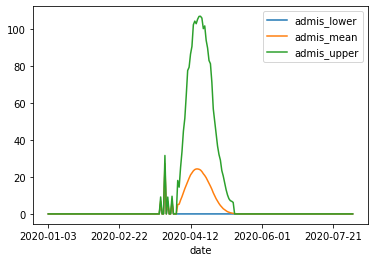

In [13]:
ihme_admis.plot()

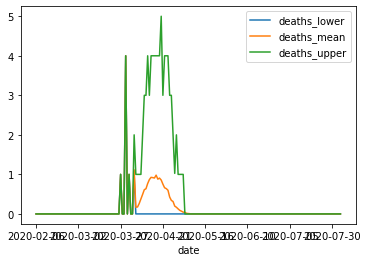

In [44]:
ihme_deaths.plot()

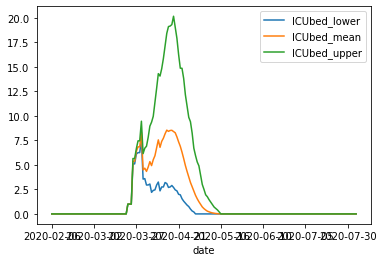

In [45]:
ihme_ICUbed.plot()